# Segunda aula de Softwares para Ciência de Dados

Revisão sobre:
- Numpy
- Pandas

# Numpy

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
arr_1 = np.arange(1_000_000)
type(arr_1)

numpy.ndarray

In [17]:
list_1 = list(range(1_000_000))
type(list_1)

list

In [20]:
%time for _ in range(10): arr_2 = arr_1 * 2

CPU times: total: 15.6 ms
Wall time: 11 ms


In [22]:
%time for _ in range(10): list_2 = [x*2 for x in list_1]

CPU times: total: 422 ms
Wall time: 419 ms


In [28]:
%time
_temp = 0
list_3 = []
for x in list_1:
    _temp = x * 2
    list_3.append(_temp)

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
422/15

28.133333333333333

In [37]:
s = np.random.normal(0.0, 0.5, 1000)

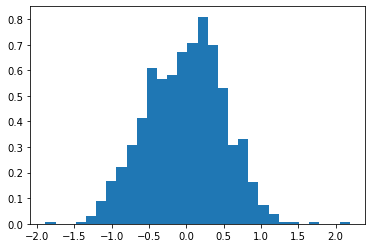

In [38]:
count, bins, ignored = plt.hist(s, 30, density=True)

In [39]:
# Vamos agora trabalhar com arrays multidimensionais
data = np.random.rand(3, 4)
data

array([[0.20856445, 0.49027376, 0.03845196, 0.55642384],
       [0.04668196, 0.75453022, 0.54371054, 0.8033399 ],
       [0.97804009, 0.41705706, 0.88887556, 0.47671276]])

In [40]:
data * 10

array([[2.08564451, 4.90273756, 0.38451963, 5.56423837],
       [0.46681956, 7.5453022 , 5.43710544, 8.03339902],
       [9.78040095, 4.17057059, 8.88875562, 4.76712758]])

In [41]:
data + data

array([[0.4171289 , 0.98054751, 0.07690393, 1.11284767],
       [0.09336391, 1.50906044, 1.08742109, 1.6066798 ],
       [1.95608019, 0.83411412, 1.77775112, 0.95342552]])

In [42]:
data * data

array([[0.04349913, 0.24036836, 0.00147855, 0.30960749],
       [0.0021792 , 0.56931585, 0.29562116, 0.645355  ],
       [0.95656243, 0.17393659, 0.79009976, 0.22725505]])

In [44]:
data_size = data.shape[0]
data_size

3

In [45]:
data.dtype

dtype('float64')

In [46]:
# Criando um array 2d
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
array_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
array_2d[1, 1:2]

array([5])

<img src="slice.png" alt="drawing" style="width:300px;"/>

### Programação Orientada a Arrays

Arrays nos permitem expressar vários tipos de tarefas de processamento de dados ma fprma de expressões concisas de arrays que poderiam exigir laços. Este processo é chamado de *vetorização*.

Trabalhar com vetorização sempre é mais rápido e eficiente do que com laços.

In [85]:
from mpl_toolkits.mplot3d import Axes3D

In [80]:
points = np.arange(-5, 5, 0.1)
len(points)

100

In [90]:
xs, ys, zs = np.meshgrid(points, points, points)

In [88]:
zs.shape

(100, 100, 100)

In [83]:
z = np.sqrt(xs**2 + ys**2 + zs**2)

TypeError: Invalid shape (100, 100, 100) for image data

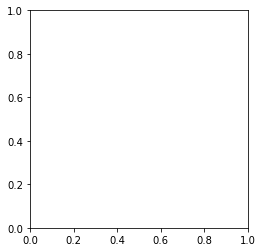

In [84]:
plt.imshow(z, cmap=plt.cm.Blues_r);
plt.colorbar()

C:\Users\jrste\AppData\Local\Temp\ipykernel_15988\1970680362.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


ValueError: Argument Z must be 2-dimensional.

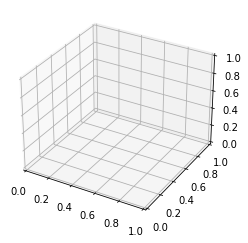

In [87]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(xs, ys, zs, cmap=plt.cm.Blues_r,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


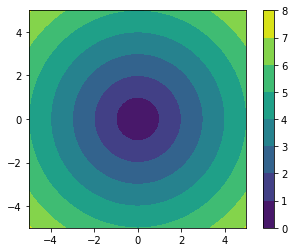

In [76]:
h = plt.contourf(xs, ys, z)
plt.axis('scaled')
plt.colorbar()

### Métodos Matemáticos e Estatísticos

O numpy possui algumas funções que nos ajudam em uma anaálise inicial dos dados ... falo inicial por que existem bibliotecas para aprofundar tal análise.

Vamos ver estas funçõe.

In [95]:
# Vamos primeiro gerar um array (5, 4) com valores aleatórios.
arr = np.random.randn(50, 40)
arr

array([[-0.39224579, -0.56043781,  0.43871728, ...,  0.59025089,
         0.93870543,  1.02663172],
       [ 0.46891454,  0.21973999, -0.05139093, ...,  1.60283125,
         0.67154815, -0.92450584],
       [ 0.14146075,  0.14937366,  0.13582577, ..., -0.26750753,
        -1.08098909,  1.40064787],
       ...,
       [ 0.45179319, -0.692842  ,  0.95327093, ..., -0.20095548,
         1.17799377, -0.95014191],
       [ 2.72788279,  0.02951516, -0.94279679, ...,  0.60855474,
        -1.16018959, -1.64482287],
       [ 0.58764358,  0.86372729,  0.97427138, ...,  1.10879142,
        -0.45613097, -0.09796091]])

In [96]:
# Valor médio Python padrão
%time arr.mean()

CPU times: total: 0 ns
Wall time: 0 ns


-0.004816470756388671

In [98]:
# Valor médio numpy
%time np.mean(arr)

CPU times: total: 0 ns
Wall time: 0 ns


-0.004816470756388671

In [99]:
np.std(arr)

0.9839847614141275

In [100]:
np.var(arr)

0.9682260106952174

In [101]:
np.median(arr)

-0.055973446990928086

<img src="download.png" alt="drawing" style="width:300px;"/>

Área da circunferência
$$
    A = \pi r^2
$$

mas se tomarmos $r = 1$, ficamos com
$$
    A = \pi
$$

$$
    x^2 + y^2 = 1 
$$

In [161]:
def circle_test(x, y):
    _temp = x**2 + y**2
    if _temp <= 1:
        return 1
    else:
        return 0

def coin(state):
    _states = ['h', 't']
    if np.random.choice(_states) == state:
        return 1
    else:
        return 0

In [165]:
n_runs = 10000
count = 0
probs = []
times = []
xi = []
yi = []
xo = []
yo = []
for i in range(1, n_runs+1):
    x = np.random.rand()
    y = np.random.rand()
    count += coin('h')
    probs.append(count/i)
    times.append(i)

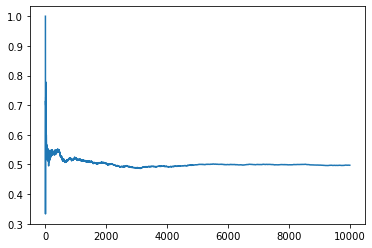

In [166]:
plt.plot(times, probs)

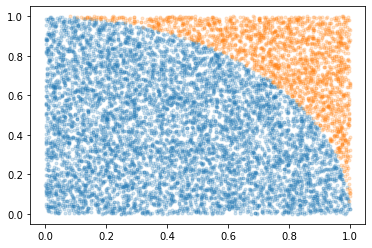

In [159]:
plt.scatter(xi, yi, alpha=0.2, marker='.')
plt.scatter(xo, yo, alpha=0.2, marker='.')

## Pandas

Construído usando o numpy e fazendo parte do ecosistema do SciPy, o Pandas é uma biblioteca poderosa para tratamento de grandes volumes de dados.

Vamos passar pelas principais funcionalidade, deixando comandos mais específicos para quando formos trabalhar com projetos de ciência de dados.

In [168]:
import pandas as pd

In [169]:
pd.__version__

'1.4.2'

In [215]:
raw_data = pd.Series(np.random.randn(10))
raw_data.index

RangeIndex(start=0, stop=10, step=1)

In [216]:
raw_data[10] = np.nan
raw_data

0    -1.902400
1    -0.014117
2     0.510535
3     0.149637
4    -0.439942
5     1.681189
6     0.675994
7    -1.255311
8    -0.404955
9     1.776882
10         NaN
dtype: float64

In [218]:
clean_data = raw_data.fillna(np.mean(serie_1))
clean_data

0    -1.902400
1    -0.014117
2     0.510535
3     0.149637
4    -0.439942
5     1.681189
6     0.675994
7    -1.255311
8    -0.404955
9     1.776882
10    0.228521
dtype: float64

In [219]:
clean_data[1:4]

1   -0.014117
2    0.510535
3    0.149637
dtype: float64

In [220]:
x_treino = clean_data[:7]
x_treino

0   -1.902400
1   -0.014117
2    0.510535
3    0.149637
4   -0.439942
5    1.681189
6    0.675994
dtype: float64

In [222]:
x_test = clean_data[7:]
x_test

7    -1.255311
8    -0.404955
9     1.776882
10    0.228521
dtype: float64

In [224]:
clean_data_abs = np.abs(clean_data)
clean_data_abs[clean_data_abs > 0]

0     1.902400
1     0.014117
2     0.510535
3     0.149637
4     0.439942
5     1.681189
6     0.675994
7     1.255311
8     0.404955
9     1.776882
10    0.228521
dtype: float64

In [226]:
clean_data_exp = np.exp(clean_data)

In [227]:
clean_data_exp

0     0.149210
1     0.985982
2     1.666183
3     1.161413
4     0.644074
5     5.371939
6     1.965987
7     0.284987
8     0.667006
9     5.911398
10    1.256740
dtype: float64

<AxesSubplot:>

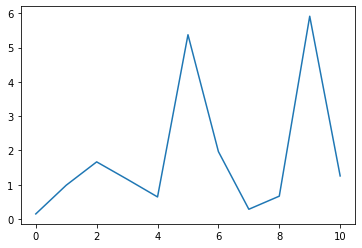

In [228]:
clean_data_exp.plot()

O conjunto de dados que vamos usar aqui em alguns exemplos, se encontra dentro da pasta ./data.

Uma boa prática é definir uma variável que armazene o caminho de ./data.

Esta variável, por padrão, é em letras maiúsculas.


In [229]:
DATA_DIR = './data/'

In [230]:
DATA_DIR

'./data/'

Uma outra biblioteca bastante útil é a os. Ela contem uma série de comandos que nos ajudam a manipular arquivos, diretórios ... dentro do sistema

In [231]:
import os

Vamos usar o os.listdir, para verificarmos o que existe dentro da pasta './data'

In [232]:
os.listdir(DATA_DIR)

['.ipynb_checkpoints', 'iris.csv']

In [233]:
os.makedirs("teste")

Vamos usar o pandas para importar o arquivo 'iris.csv'. Para isso usamos o módulo

```python
pd.read_csv(<file_path>, options)
```

In [235]:
df = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv'))

In [238]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [239]:
classes = df["class"].unique()

In [240]:
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

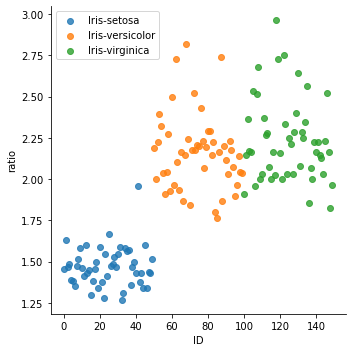

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
df["ID"] = df.index
df["ratio"] = df["sepal_length"]/df["sepal_width"]

sns.lmplot(x="ID", y="ratio", data=df, hue="class", fit_reg=False, legend=False)

plt.legend()
plt.show()

In [251]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

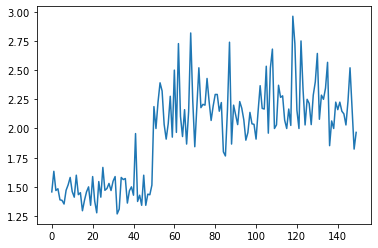

In [248]:
ratio.plot()

In [250]:
id = df.pop("ID")
id

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: ID, Length: 150, dtype: int64

Vamos criar uma série do Pandas, o que em um dataframe, é justamente uma coluna.

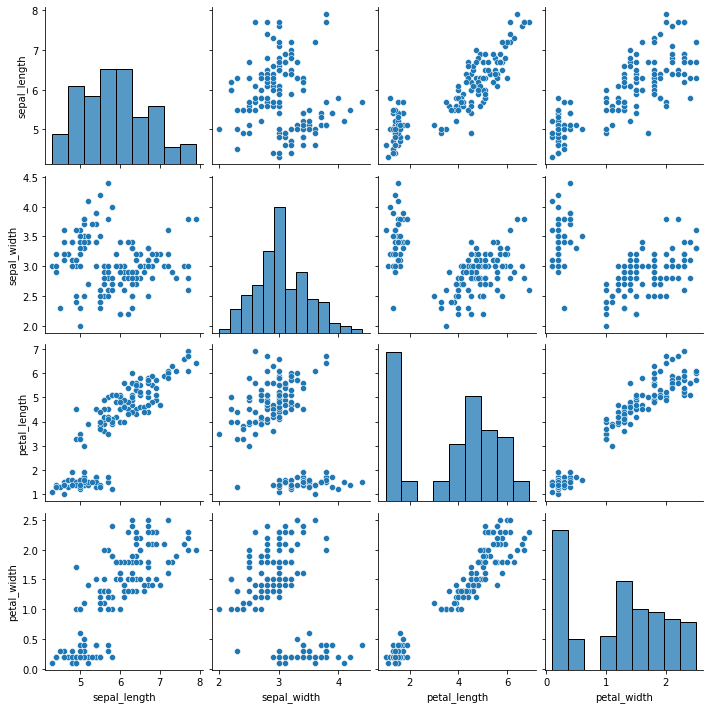

In [252]:
sns.pairplot(df)

In [253]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


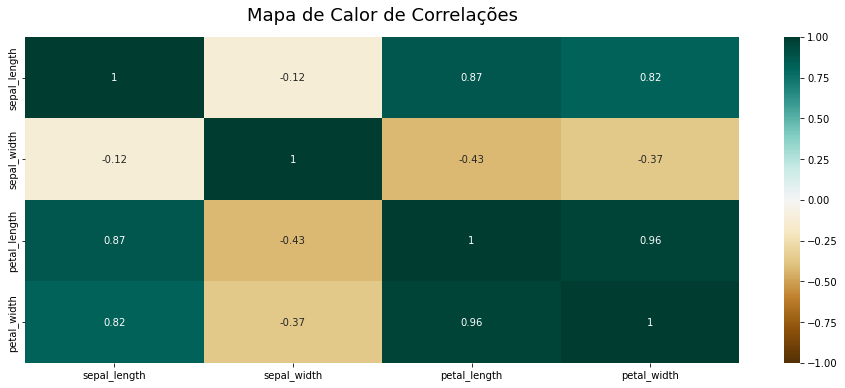

In [254]:
plt.figure(figsize=(16, 6))
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Calor de Correlações', fontdict={'fontsize':18}, pad=16);

In [255]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [261]:
import pandas_profiling

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\jrste\anaconda3\lib\site-packages\markupsafe\__init__.py)

In [258]:
!pip install pandas-profiling[notebook]

^C
